<a href="https://colab.research.google.com/github/srivastavanishtha/AI-ML-Algorithms-using-Python/blob/master/Diabetes_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
n_samples = 1000

data = {
    'age': np.random.randint(18, 80, n_samples),
    'gender': np.random.choice(['M', 'F', 'O', np.nan], n_samples),
    'bmi': np.random.normal(27, 5, n_samples),
    'blood_pressure': np.random.normal(120, 15, n_samples),
    'glucose_level': np.random.normal(100, 25, n_samples),
    'hba1c': np.random.normal(5.7, 1, n_samples),
    'family_history': np.random.choice([0, 1, np.nan], n_samples),
    'smoking_status': np.random.choice(['Never', 'Former', 'Current', np.nan], n_samples),
    'physical_activity': np.random.choice(['Low', 'Moderate', 'High', np.nan], n_samples),
    'diabetes_risk': np.nan  # This will be our target variable
}

df = pd.DataFrame(data)

# Introduce some missing values and outliers
df.loc[np.random.choice(df.index, 50), 'bmi'] = np.nan
df.loc[np.random.choice(df.index, 30), 'glucose_level'] = np.random.normal(300, 50, 30)
df.loc[np.random.choice(df.index, 20), 'blood_pressure'] = np.random.normal(200, 20, 20)

# Save the DataFrame to a CSV file
df.to_csv('diabetes_risk_data.csv', index=False)

print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

   age gender        bmi  blood_pressure  glucose_level     hba1c  \
0   56      O  28.787631      121.982051      92.389756  6.323950   
1   69      M  24.063653      139.959256     106.053937  7.000494   
2   46      F  26.036101      122.930629      82.152725  4.916172   
3   32      O  26.229816      185.996196     142.254441  7.800979   
4   60      M  33.784284      119.038945     123.134952  7.362999   

   family_history smoking_status physical_activity  diabetes_risk  
0             1.0          Never               Low            NaN  
1             1.0          Never               nan            NaN  
2             0.0        Current               Low            NaN  
3             NaN         Former               Low            NaN  
4             1.0         Former               Low            NaN  

Dataset shape: (1000, 10)

Missing values:
 age                     0
gender                  0
bmi                    50
blood_pressure          0
glucose_level           0
hb

In [5]:

# Impute missing values for numerical features with the mean
for column in df.select_dtypes(include=np.number):
  df[column].fillna(df[column].mean(), inplace=True)

# Impute missing values for categorical features with the mode
for column in df.select_dtypes(include='object'):
  df[column].fillna(df[column].mode()[0], inplace=True)

# Assuming 'nan' string values are also considered missing for categorical features
for column in df.select_dtypes(include='object'):
  df[column] = df[column].replace('nan', df[column].mode()[0])


In [ ]:


# # For numerical features like BMI, we can impute the missing values with the mean or median.
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# # For categorical features like family_history, we can impute the missing values with the mode.
# df['family_history'] = df['family_history'].fillna(df['family_history'].mode()[0])

# # Check if there are still any missing values
# print("\nMissing values after imputation:\n", df.isnull().sum())



Missing values after imputation:
 age                     0
gender                  0
bmi                     0
blood_pressure          0
glucose_level           0
hba1c                   0
family_history          0
smoking_status          0
physical_activity       0
diabetes_risk        1000
dtype: int64


In [6]:


# Remove outliers based on IQR for numerical features
for col in ['bmi', 'blood_pressure', 'glucose_level']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print("\nDataset shape after outlier removal:", df.shape)



Dataset shape after outlier removal: (929, 10)


In [7]:


# Create age groups
bins = [18, 30, 45, 60, float('inf')]
labels = ['18-29', '30-44', '45-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Create BMI categories
def bmi_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi < 25:
    return 'Normal'
  elif bmi < 30:
    return 'Overweight'
  else:
    return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Create hypertension flag
df['hypertension'] = (df['blood_pressure'] >= 140).astype(int)

print(df[['age', 'age_group', 'bmi', 'bmi_category', 'blood_pressure', 'hypertension']].head())


   age age_group        bmi bmi_category  blood_pressure  hypertension
0   56     45-59  28.787631   Overweight      121.982051             0
1   69       60+  24.063653       Normal      139.959256             0
2   46     45-59  26.036101   Overweight      122.930629             0
4   60     45-59  33.784284        Obese      119.038945             0
5   25     18-29  25.202814   Overweight      111.145868             0


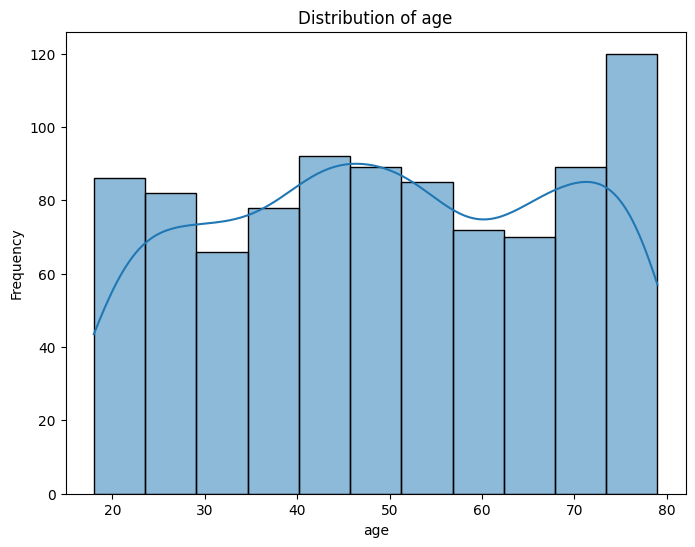

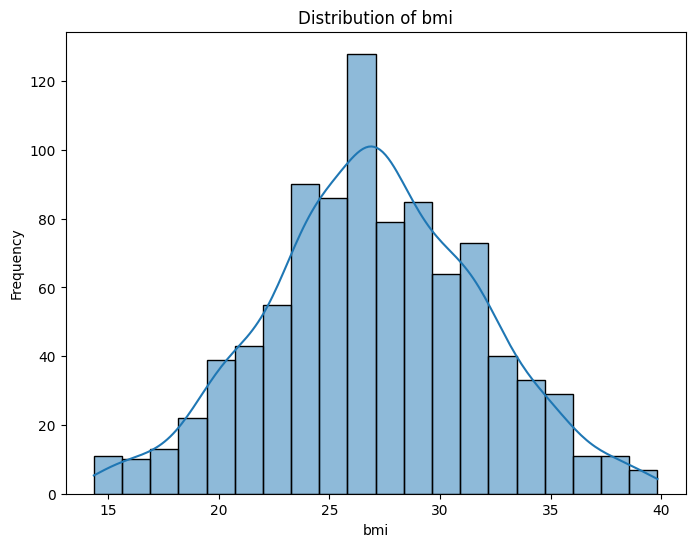

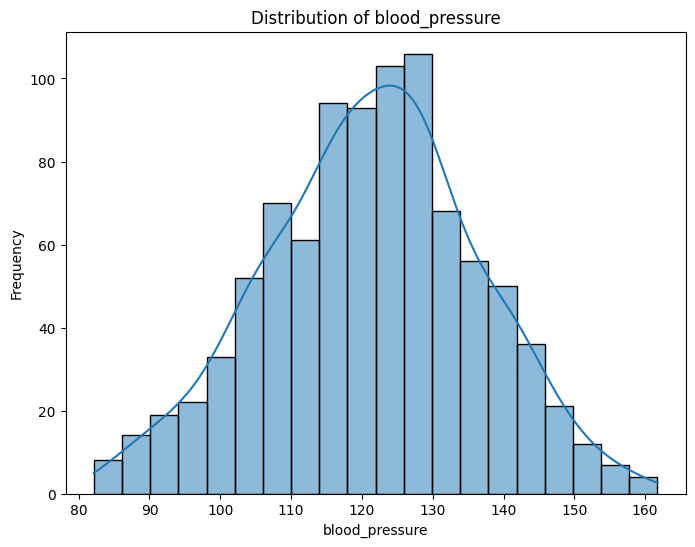

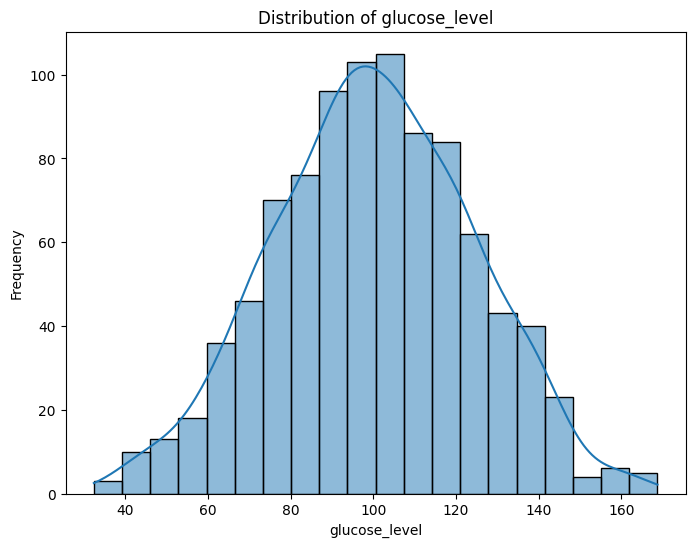

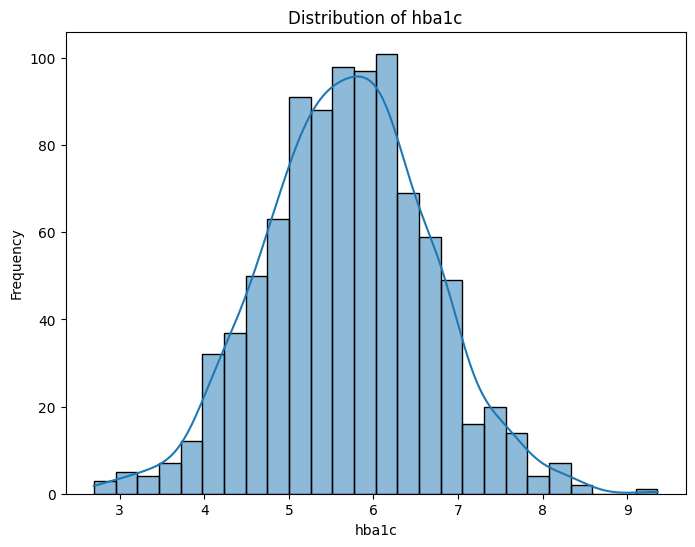

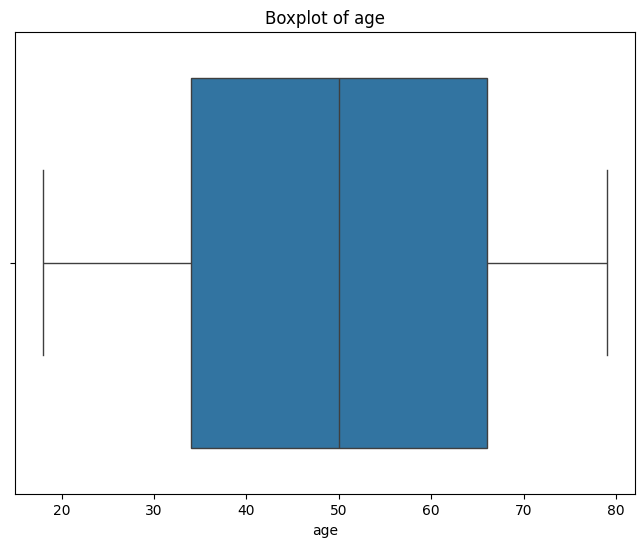

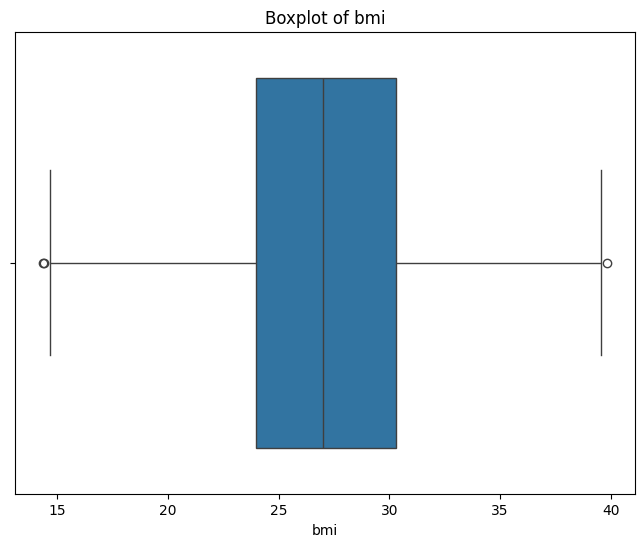

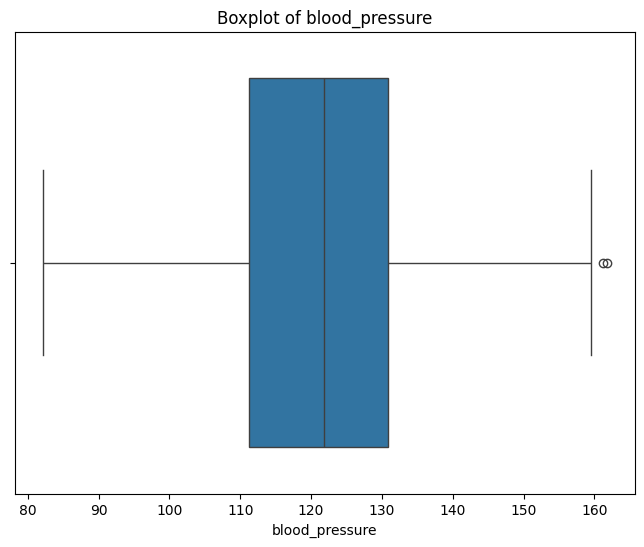

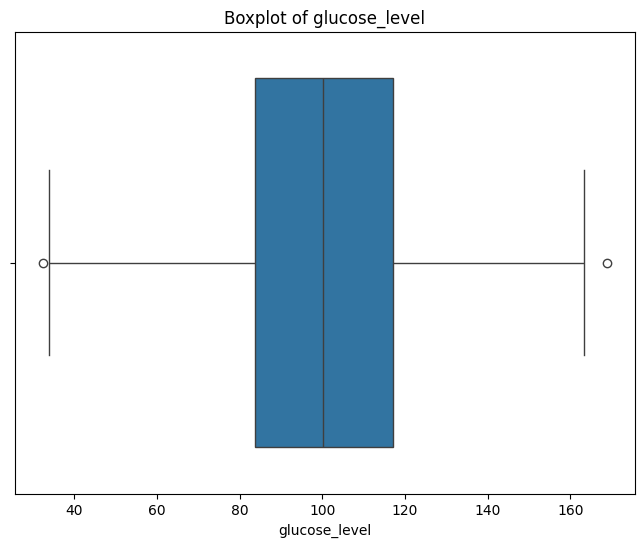

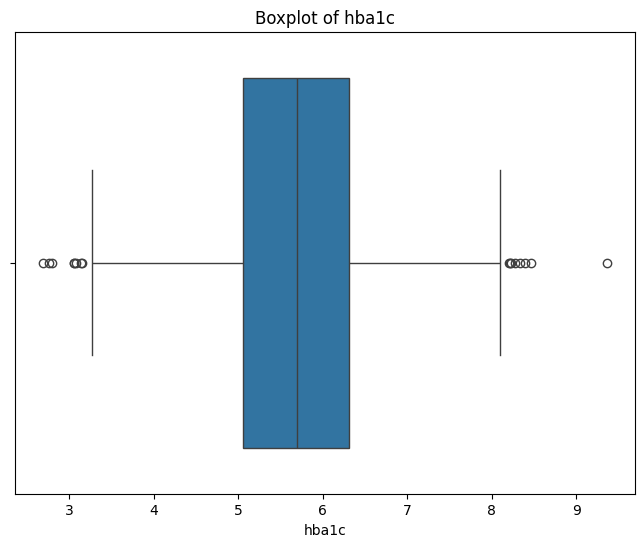

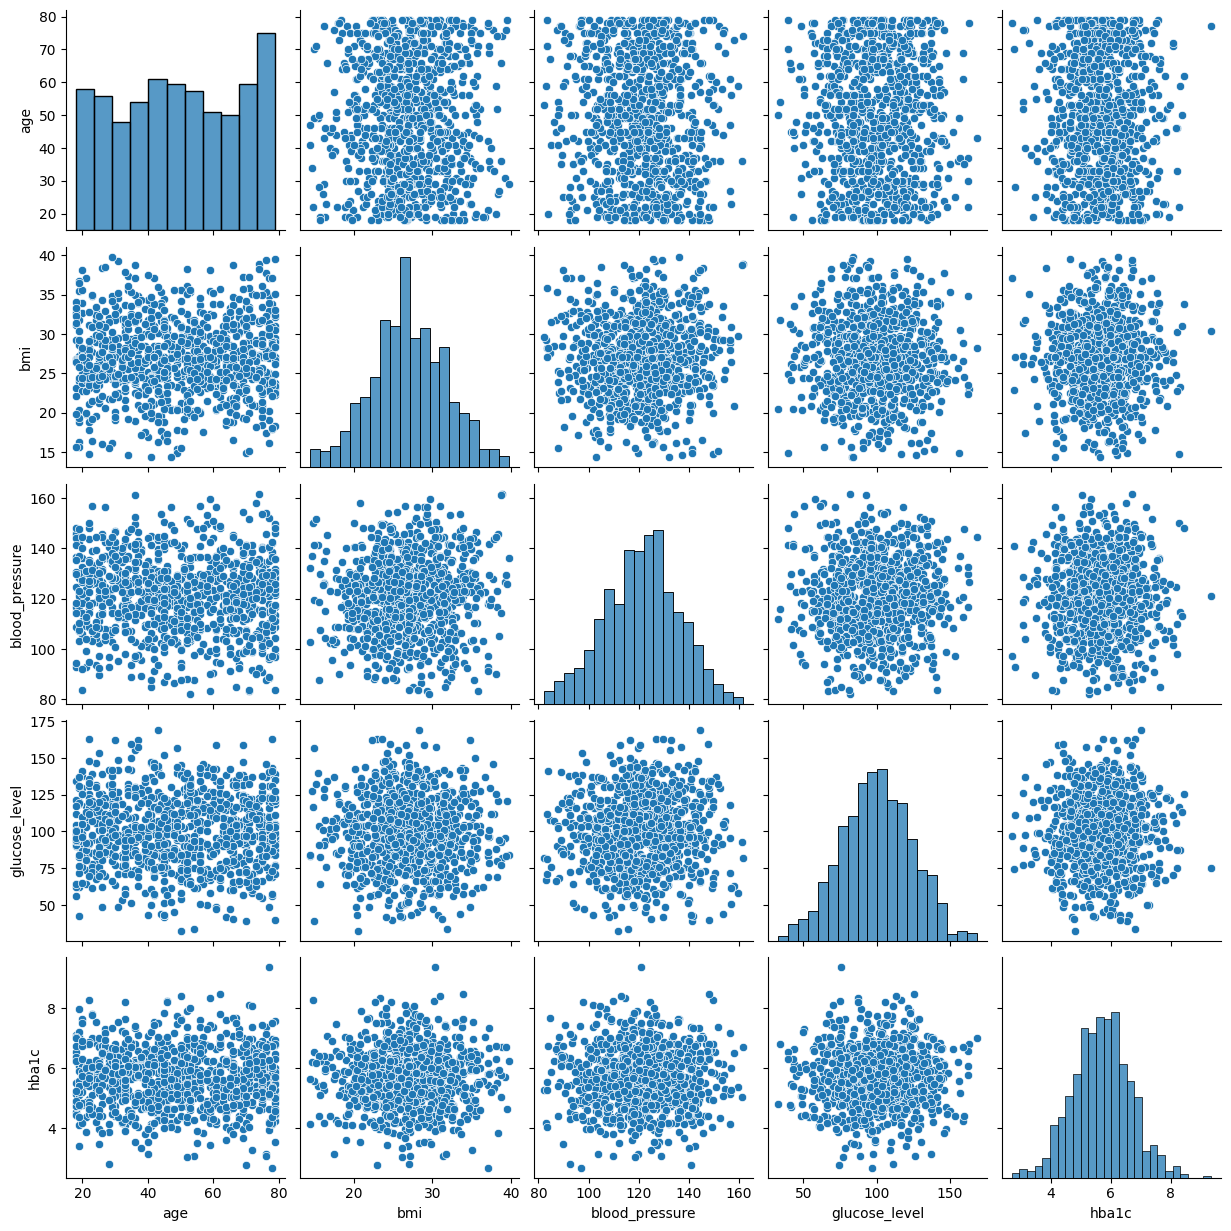

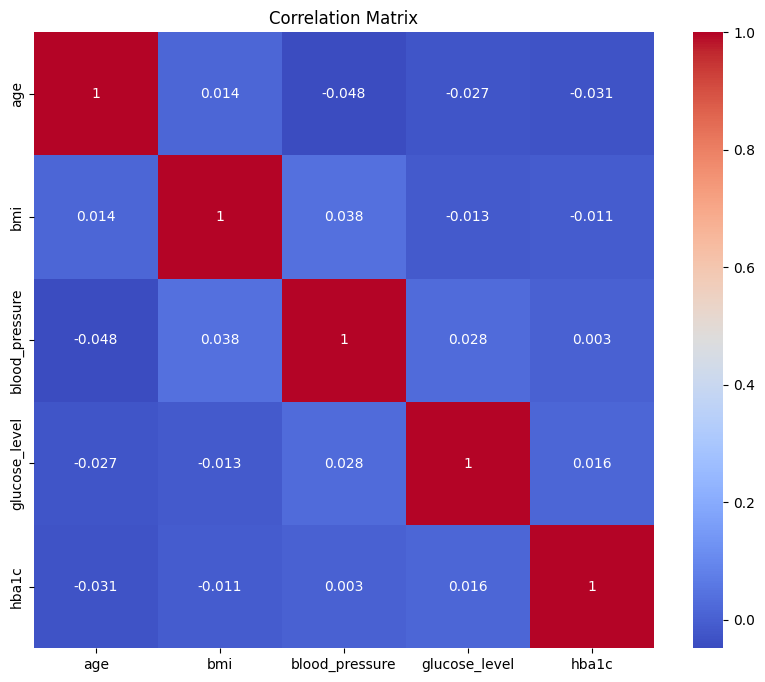

In [8]:

# # Visualize distribution of numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numerical features
for col in ['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

# Boxplots for numerical features
for col in ['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


# Pairplot for correlation analysis
sns.pairplot(df[['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']])
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:
df.describe()


,age,bmi,blood_pressure,glucose_level,hba1c,family_history,diabetes_risk,hypertension
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,0.0,929.000000
mean,49.664155,27.004958,121.253489,100.026418,5.692598,0.525312,NaN,0.114101
std,18.210906,4.836677,14.972338,24.186334,0.969481,0.404764,NaN,0.318105
min,18.000000,14.353313,82.147688,32.412997,2.693756,0.000000,NaN,0.000000
25%,34.000000,23.963272,111.300944,83.598957,5.059268,0.000000,NaN,0.000000
50%,50.000000,27.017490,121.817204,100.043359,5.695741,0.520424,NaN,0.000000
75%,66.000000,30.287598,130.907486,117.121068,6.310898,1.000000,NaN,0.000000
max,79.000000,39.820290,161.737677,168.768076,9.357702,1.000000,NaN,1.000000


In [10]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Assuming 'diabetes_risk' is the target variable
# You'll need to define how you determine diabetes risk based on the features

# Define a function to predict diabetes risk based on the features
def predict_diabetes_risk(row):
    risk_score = 0
    if row['bmi'] >= 30:
        risk_score += 2
    if row['blood_pressure'] >= 140:
        risk_score += 2
    if row['glucose_level'] >= 126:
        risk_score += 3
    if row['hba1c'] >= 6.5:
        risk_score += 3
    if row['family_history'] == 1:
        risk_score += 2
    if row['smoking_status'] == 'Current':
        risk_score += 2
    if row['physical_activity'] == 'Low':
        risk_score += 1

    if risk_score >= 8:
        return 1  # High risk
    else:
        return 0  # Low risk


# Apply the function to create the target variable
df['diabetes_risk'] = df.apply(predict_diabetes_risk, axis=1)

# Split data into training and testing sets
X = df.drop('diabetes_risk', axis=1)
y = df['diabetes_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = ['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']
categorical_features = ['gender', 'smoking_status', 'physical_activity', 'age_group', 'bmi_category']

# Create a ColumnTransformer to handle different feature types
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and a RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8978494623655914

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       167
           1       0.50      0.16      0.24        19

    accuracy                           0.90       186
   macro avg       0.71      0.57      0.59       186
weighted avg       0.87      0.90      0.87       186



In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(y_test.unique())

[[164   3]
 [ 16   3]]
[1 0]


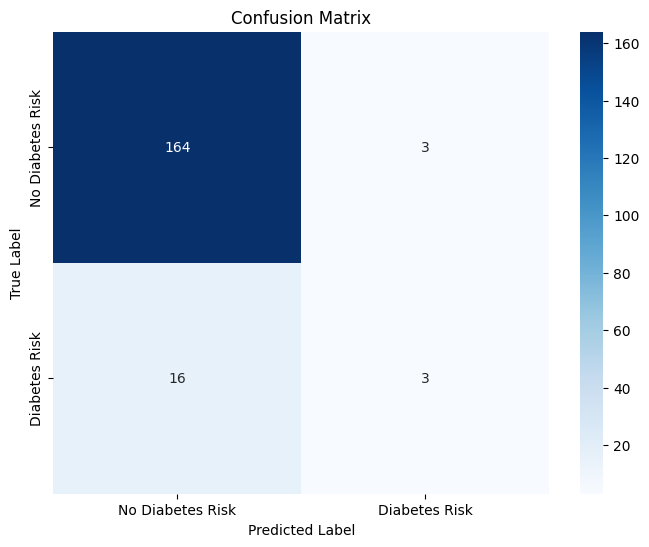

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Generate a well-labeled confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes Risk', 'Diabetes Risk'],
            yticklabels=['No Diabetes Risk', 'Diabetes Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       167
           1       0.50      0.16      0.24        19

    accuracy                           0.90       186
   macro avg       0.71      0.57      0.59       186
weighted avg       0.87      0.90      0.87       186


Confusion Matrix:
[[164   3]
 [ 16   3]]


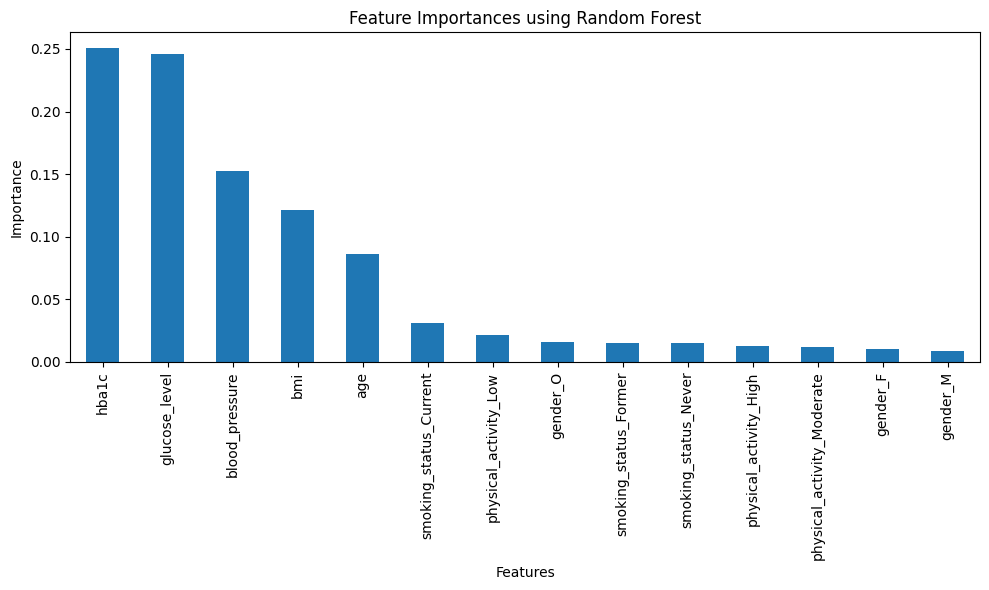

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# 6. Model Building
# Prepare features and target
X = df.drop(['diabetes_risk', 'age_group', 'bmi_category'], axis=1)
y = df['diabetes_risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_features = ['age', 'bmi', 'blood_pressure', 'glucose_level', 'hba1c']
categorical_features = ['gender', 'smoking_status', 'physical_activity']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance
# We'll use a Random Forest for feature importance
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_clf.fit(X_train, y_train)



# Get feature names using get_feature_names_out
feature_names = (numeric_features +
                 clf.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())  # Use get_feature_names_out

importances = rf_clf.named_steps['classifier'].feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.plot.bar()
plt.title("Feature Importances using Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [14]:


from sklearn.model_selection import cross_val_score

# Assuming you have your pipeline 'clf' defined as before

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # Use 5-fold cross-validation

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.94623656 0.94623656 0.96236559 0.94623656 0.93513514]
Mean cross-validation score: 0.947242080790468


In [15]:


from sklearn.metrics import r2_score

# Assuming you have y_test and y_pred from your model
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: -0.11377245508982048
